In [219]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
with h5py.File("./data/ecg_tracings.hdf5", "r") as f:
    x = np.array(f['tracings'])

In [220]:
labels = ['DI', 'DII', 'DIII', 'AVL', 'AVF', 'AVR', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
reference = np.concatenate([np.repeat(0, 40),
                            np.repeat(1, 40),
                            np.repeat(0, 400-(40*2))])

In [221]:
case = np.array(x[47])

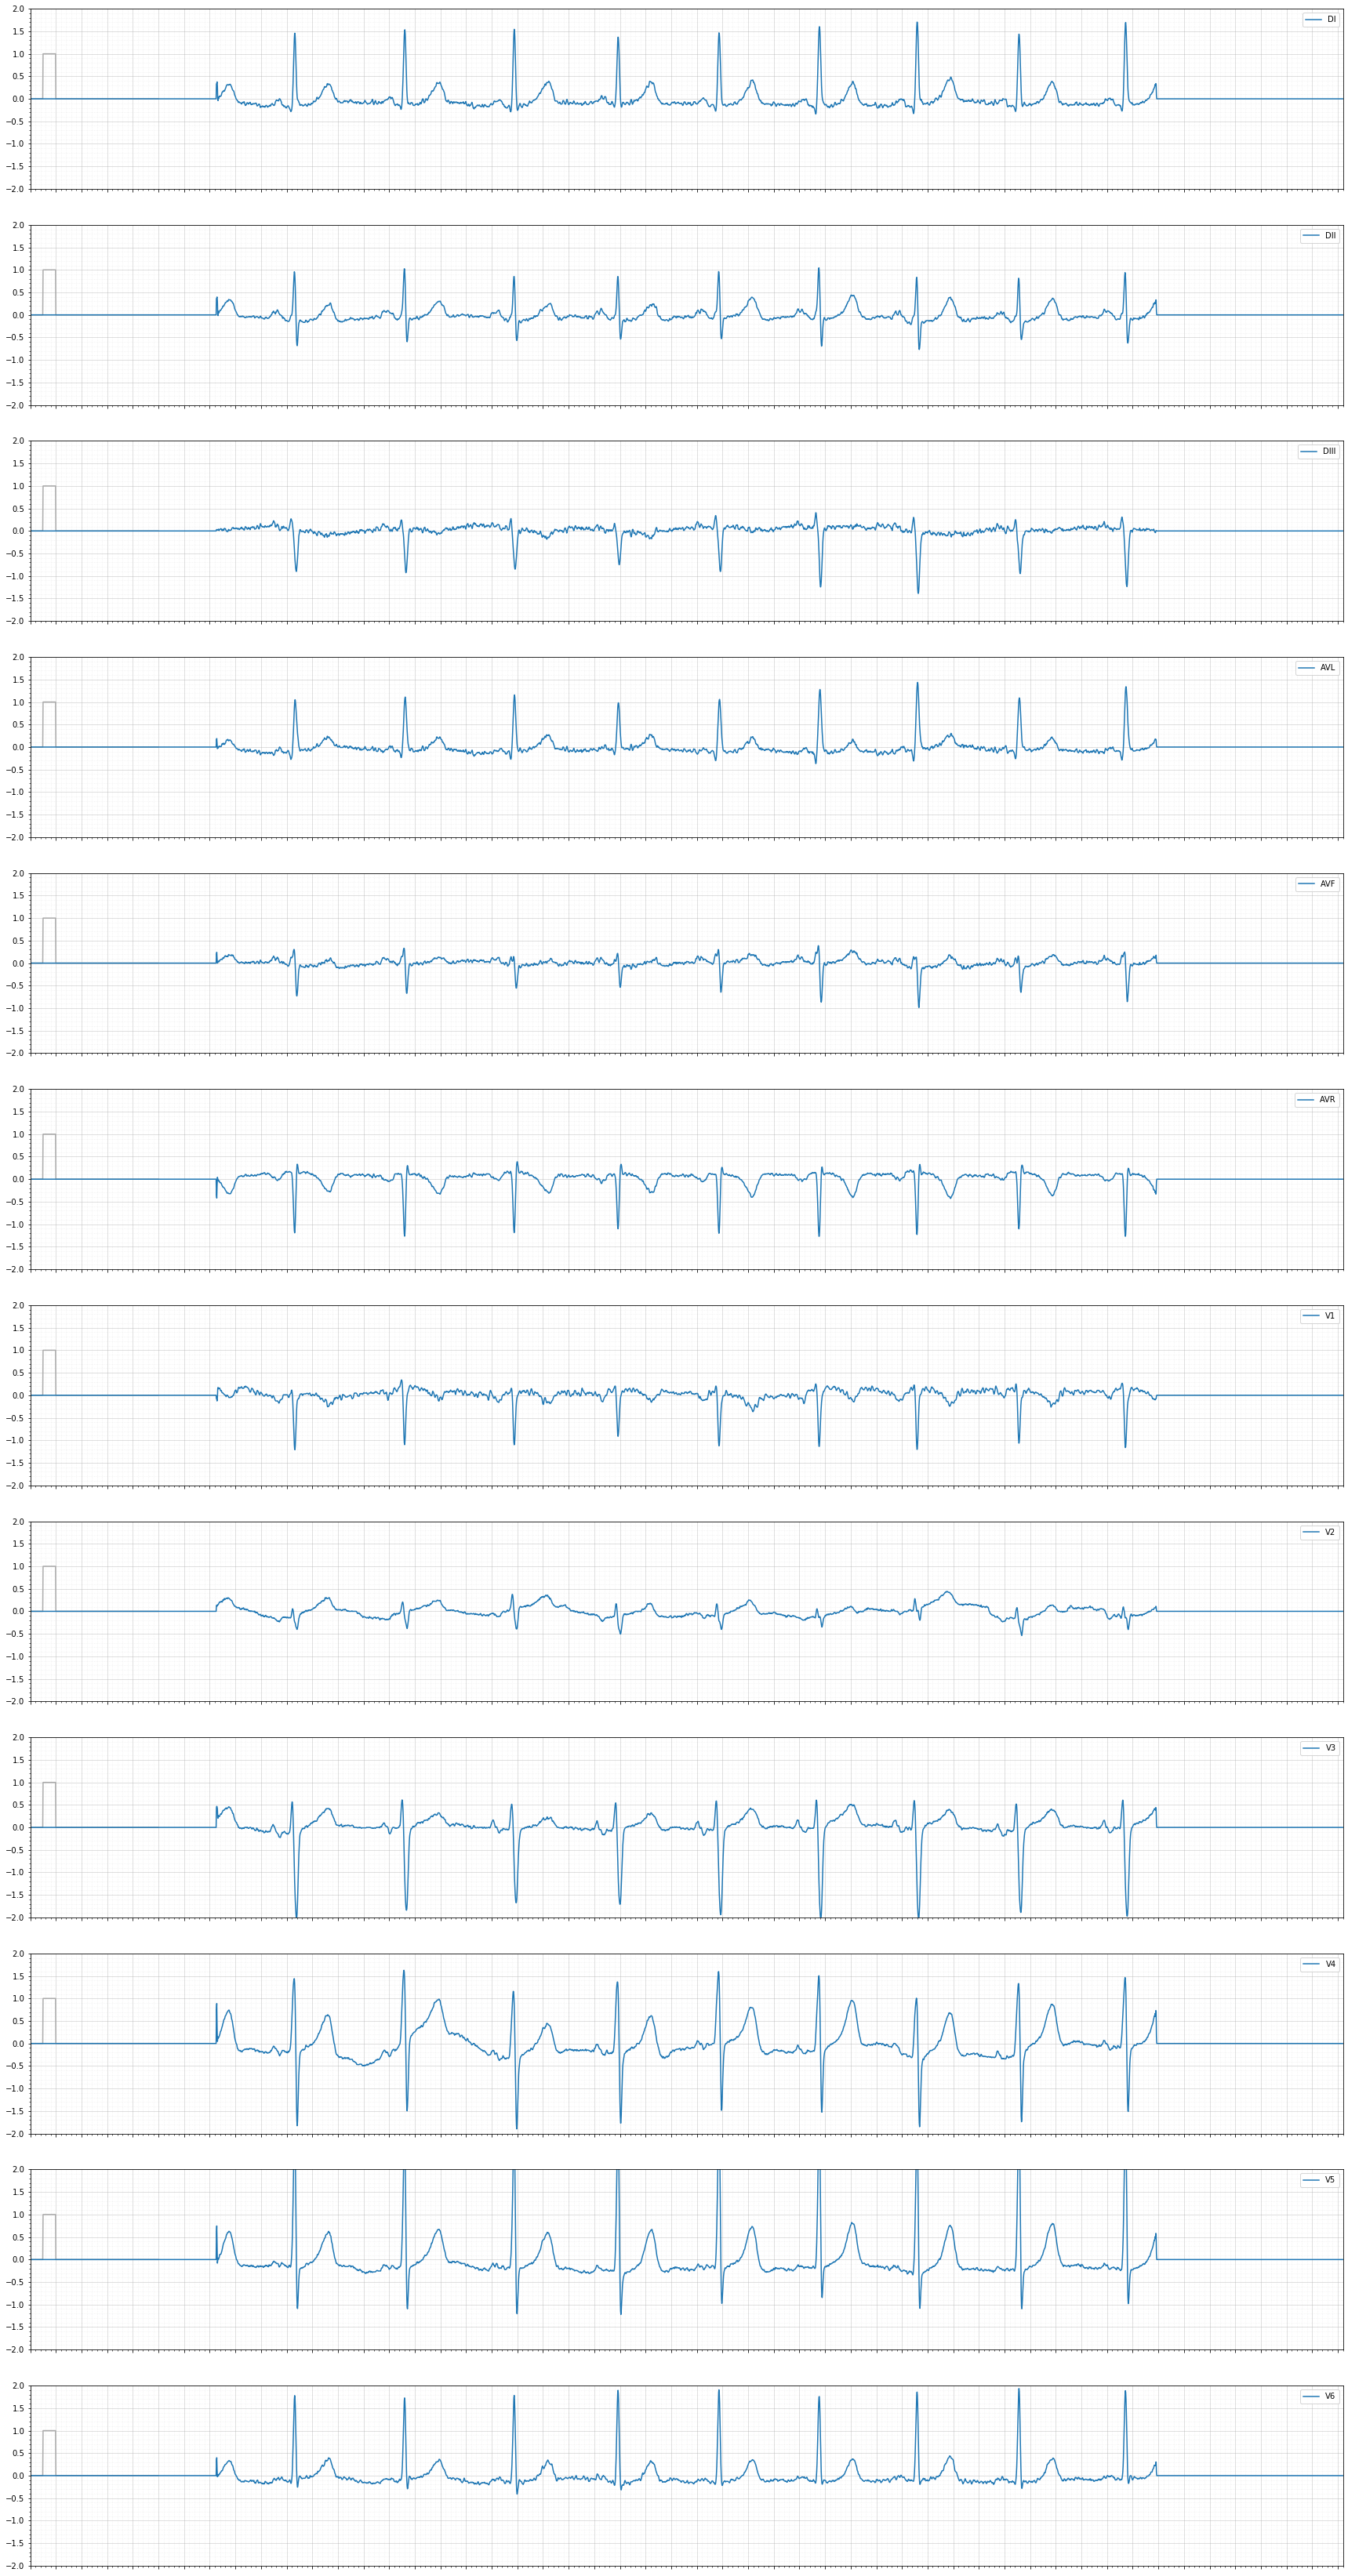

In [222]:
fig = plt.figure(figsize=(30, 60))
spacing = 0.5
for i in range(12):
    fx = fig.add_subplot(12,1,i+1)
    fx.plot(reference, color = '#aaaaaa', label='_nolegend_')
    v = case[:, i] # 32 bits floating point numbers at the scale 1e-4V -> I doubt...
    fx.plot(v, label=labels[i])
    fx.axis([0, 4096, -2, 2])
    fx.yaxis.set_major_locator(MultipleLocator(.5)) 
    fx.yaxis.set_minor_locator(AutoMinorLocator(5))
    fx.xaxis.set_major_locator(MultipleLocator(80)) # 4096 points of the ECG tracings sampled at 400Hz -> 80 samples = 0.2s
    fx.xaxis.set_minor_locator(AutoMinorLocator(5))
    fx.xaxis.set_major_formatter(plt.NullFormatter())
    fx.grid(which='minor', axis='y', ls=':', alpha=0.2)
    fx.grid(which='major', axis='y', ls='-', alpha=0.5)
    fx.grid(which='major', axis='x', ls='-', alpha=0.5)
    fx.grid(which='minor', axis='x', ls=':', alpha=0.2)
    fx.legend()
plt.show()